In [1]:
from model_validation import create_pamfit, create_pam_fig, make_protocol, calc_pam_vals, calc_pam_vals2, pamfit_sim
from mxlbricks import get_saadat2021
import mxlbricks.names as n
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from mxlpy import Simulator

In [3]:
fit_data = pd.read_csv("Data/fluo_col0_1.csv", index_col=0)
    
#Convert index to time in seconds
fit_data.index = pd.to_timedelta(fit_data.index)
fit_data.index = fit_data.index - fit_data.index[0]
fit_data.index = fit_data.index.total_seconds()

# Create Pam Protocol
time_simed = 0
fit_protocol = []

for time in fit_data.index:
    if time != 0:
        if fit_data.loc[time, "PAR"] == 0:
            pfd_val = 40
        else:
            pfd_val = fit_data.loc[time, "PAR"]
        fit_protocol.append((time - time_simed - 0.8, {n.pfd(): pfd_val}))
    fit_protocol.append((0.8, {n.pfd(): 5000}))
    time_simed = time
    
model = get_saadat2021()

res = pamfit_sim(
    fit_protocol=fit_protocol,
    model=model,
    pfd_str=n.pfd(),
)

res = res.get_variables()
Fm, NPQ = calc_pam_vals2(res["Fluo"], protocol=make_protocol(fit_protocol), pfd_str=n.pfd())


[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 988.965723471372 and h = 0.00380612515800586, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 1049.95852609686 and h = 0.00452815125183347, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 1171.94144127895 and h = 0.00469669674135302, the corrector convergence test failed repeatedly or with |h| = hmin.


In [9]:
NPQ.values = 1e6

AttributeError: property 'values' of 'Series' object has no setter

In [11]:
import numpy as np

np.array([1e6 for i in range(len(NPQ.values))])

array([1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000., 1000000.])

In [8]:
fit_data["NPQ3"]

Time
0.0       0.000000
73.0      2.250685
134.0     3.035714
195.0     3.322404
256.0     3.520000
317.0     3.652941
378.0     3.699010
439.0     3.652941
500.0     3.563462
561.0     3.520000
622.0     3.443820
683.0     1.733871
744.0     1.219832
805.0     1.181066
866.0     1.171089
927.0     1.161202
988.0     1.171089
1049.0    1.171089
1110.0    1.161202
1171.0    1.132075
1232.0    1.113090
1293.0    0.536917
1354.0    0.423515
1415.0    0.399175
1476.0    0.382867
1537.0    0.367723
Name: NPQ3, dtype: float64

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Optimization successful
Parameters([('gamma0', <Parameter 'gamma0', value=9.633497790595413e-06 +/- 0.0171, bounds=[0:inf]>)])
1000
1000


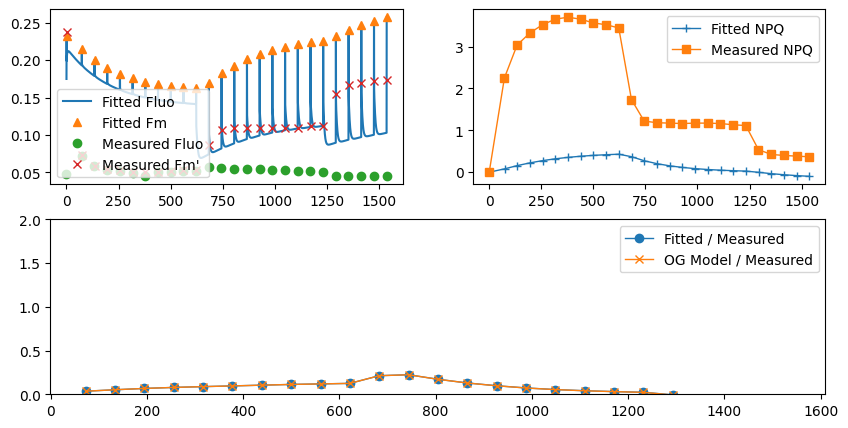

In [9]:
from fitting import pamfit_sim, create_pamfit
from mxlbricks import get_matuszynska2016npq
import mxlbricks.names as n

params = create_pamfit(
    model=get_matuszynska2016npq(),
    pfd_str=n.pfd(),
    pam_params_to_fit=["gamma0"]
)

In [8]:
from fitting import pamfit_sim, plot_pamfit, create_pamprotocol_from_data
import pandas as pd

fluo_data = pd.read_csv("Data/fluo_col0_1.csv", index_col=0)

sp_lenth = 720 / 1000  # seconds
sp_intensity = 5000  # µmol m-2 s-1

fit_protocol = create_pamprotocol_from_data(
        data=fluo_data,
        par_column="PAR",
        pfd_str=n.pfd(),
        time_sp=sp_lenth, #720ms SP to seconds
        sp_pluse=sp_intensity # 5000 µmol m-2 s-1 on IMAG-MAX/L
    )

plot_pamfit(
    model=get_matuszynska2016npq(),
    new_params=params,
    pfd_str=n.pfd(),
    fit_protocol=fit_protocol,
    fluo_data=fluo_data,
    sp_lenth=sp_lenth,
)

TypeError: unsupported operand type(s) for -: 'str' and 'int'